#Get labeled data and Unlabeled data

In [4]:
import pandas as pd
import numpy as np

In [5]:
#Load datasets
labeled = pd.read_csv("https://raw.githubusercontent.com/xxichlas/ep-nlp-sentiment-kebocorandata/main/labeled.csv")
unlabeled = pd.read_csv("https://raw.githubusercontent.com/xxichlas/ep-nlp-sentiment-kebocorandata/main/unlabeled.csv")

# TF- IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# threshold
tfidf = TfidfVectorizer()

# fit and transform
bow = tfidf.fit_transform(
  list(labeled.tweet)
)

# hasil ditampung pada dataset baru
data_vec = pd.DataFrame(
  bow.toarray(),
  columns = list(tfidf.get_feature_names_out()))


In [7]:
# output
data_vec.sample(5, random_state=123)

,abdul,abrijani,acara,action,ada,adakemiripan,adalah,ade,adik,adil,...,yak,yang,yasaatnya,yawla,youtube,yu,yuk,yukz,zendaya,zombies
494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.217296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.138269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_vec.columns

Index(['abdul', 'abrijani', 'acara', 'action', 'ada', 'adakemiripan', 'adalah',
       'ade', 'adik', 'adil',
       ...
       'yak', 'yang', 'yasaatnya', 'yawla', 'youtube', 'yu', 'yuk', 'yukz',
       'zendaya', 'zombies'],
      dtype='object', length=1731)

#Split train test

In [9]:
# kondisi data awal (barchart tiap class)
data_vec['tag'] = labeled['tipe']

data_vec['tag'].value_counts()

1    324
0    242
2     43
Name: tag, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

x = data_vec.drop(columns=['tag'])
y = data_vec.tag

# 20% menjadi data train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# jumlah masing-masing
print('Banyak data x_train :', len(x_train), x_train.shape)
print('Banyak data x_test  :', len(x_test), x_test.shape)
print('Banyak data y_train :', len(y_train), y_train.shape)
print('Banyak data y_test  :', len(y_test), y_test.shape)

Banyak data x_train : 487 (487, 1730)
Banyak data x_test  : 122 (122, 1730)
Banyak data y_train : 487 (487,)
Banyak data y_test  : 122 (122,)


In [11]:
y_train.values

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,

#Class Balancing


In [12]:
# kondisi data train awal
print('Jumlah proporsi kelas (awal)')
y_train.value_counts() # / len(y_train) * 100

Jumlah proporsi kelas (awal)


1    252
0    199
2     36
Name: tag, dtype: int64

In [13]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123, sampling_strategy={0:252, 1:252, 2:252})
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [14]:
# kondisi data train akhir
print('Jumlah proporsi kelas (setelah SMOTE)')
pd.Series(y_train_res).value_counts()

Jumlah proporsi kelas (setelah SMOTE)


0    252
1    252
2    252
Name: tag, dtype: int64

# Model pipeline

In [15]:
# import model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

RF = RandomForestClassifier()
LR = LogisticRegression()
SV = SVC()

from sklearn.pipeline import make_pipeline

pipe_RF = make_pipeline(RF)
pipe_LR = make_pipeline(LR)
pipe_SV = make_pipeline(SV)

In [16]:
# cross valiadation score
from sklearn.model_selection import cross_val_score

cv_RF = cross_val_score(pipe_RF, x_train_res, y_train_res, cv=5, scoring='accuracy').mean()
print('RF cv accuracy score: ', cv_RF)
cv_LR = cross_val_score(pipe_LR, x_train_res, y_train_res, cv=5, scoring='accuracy').mean()
print('LR cv accuracy score: ', cv_LR)
cv_SV = cross_val_score(pipe_SV, x_train_res, y_train_res, cv=5, scoring='accuracy').mean()
print('SV cv accuracy score: ', cv_SV)

RF cv accuracy score:  0.8809864064133845
LR cv accuracy score:  0.883644126873475
SV cv accuracy score:  0.9061171139769953


In [17]:
# model fit
pipe_RF.fit(x_train_res, y_train_res)
pipe_LR.fit(x_train_res, y_train_res)
pipe_SV.fit(x_train_res, y_train_res)

# model predict
predict_RF = pipe_RF.predict(x_test)
predict_LR = pipe_LR.predict(x_test)
predict_SV = pipe_SV.predict(x_test)

#Evaluation

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [19]:
# menentukan baseline dengan akurasi terbesar
y_test.value_counts() / len(y_test)

1    0.590164
0    0.352459
2    0.057377
Name: tag, dtype: float64

In [20]:
from sklearn.metrics import precision_recall_fscore_support

In [21]:
# Citiation http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, target_names, title="Confusion matrix", cmap=None, normalize=True):
  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap("Blues")

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
      plt.text(
        j,
        i,
        "{:0.4f}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
      )
    else:
      plt.text(
        j,
        i,
        "{:,}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
      )

  plt.tight_layout()

  plt.ylabel("Predicted label")

  plt.xlabel(
    "True label\naccuracy={:0.4f}; misclass={:0.4f}".format(accuracy, misclass)
  )

  plt.show()

Accuracy Random Forest Classifier:  0.8524590163934426


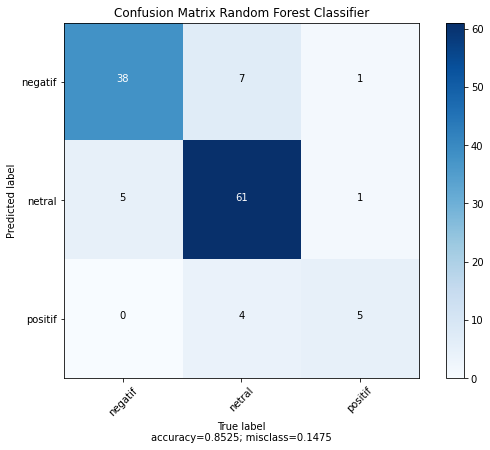

In [22]:
# Random Forest Classifier Evaluation
import itertools    
print('Accuracy Random Forest Classifier: ', accuracy_score(y_test, predict_RF))
plot_confusion_matrix(cm           = confusion_matrix(predict_RF, y_test), 
                      normalize    = False,
                      target_names = ['negatif', 'netral', 'positif'],
                      title        = "Confusion Matrix Random Forest Classifier")

In [23]:
# precision, recall, f1 score, support
macro_rf = precision_recall_fscore_support(y_test, predict_RF, average='macro')

In [31]:
macro_rf

(0.7640300910904415, 0.8150762889134983, 0.7855434753320939, None)

In [24]:
# precision, recall, f1 score, support
micro_rf = precision_recall_fscore_support(y_test, predict_RF, average='micro')

In [28]:
micro_rf

(0.8524590163934426, 0.8524590163934426, 0.8524590163934426, None)

In [48]:
# precision, recall, f1 score, support
weighted_rf = precision_recall_fscore_support(y_test, predict_RF, average='weighted')
weighted_rf

(0.8603513674204412, 0.8524590163934426, 0.8548225059664923, None)

In [27]:
import sklearn.metrics as skm
# print(len(y_pred_val))
# print(len(y_true_val))
cm = skm.multilabel_confusion_matrix(y_test, predict_RF)
print(cm)
print( skm.classification_report(y_test, predict_RF))

[[[ 71   8]
  [  5  38]]

 [[ 44   6]
  [ 11  61]]

 [[111   4]
  [  2   5]]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.91      0.85      0.88        72
           2       0.56      0.71      0.63         7

    accuracy                           0.85       122
   macro avg       0.76      0.82      0.79       122
weighted avg       0.86      0.85      0.85       122



Accuracy Logistic Regression:  0.8278688524590164


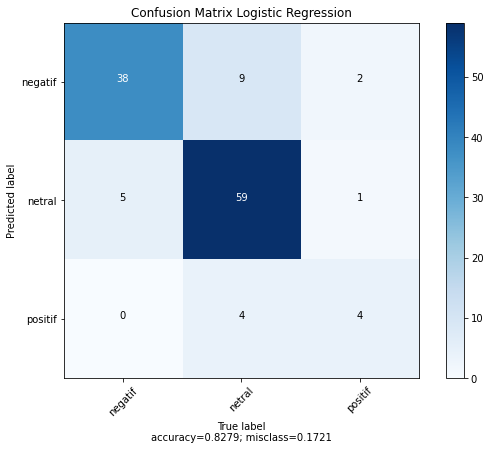

In [32]:
# Logistic Regression Evaluation
print('Accuracy Logistic Regression: ', accuracy_score(y_test, predict_LR))
plot_confusion_matrix(cm           = confusion_matrix(predict_LR, y_test), 
                      normalize    = False,
                      target_names = ['negatif', 'netral', 'positif'],
                      title        = "Confusion Matrix Logistic Regression")

In [33]:
# precision, recall, f1 score, support
macro_lr = precision_recall_fscore_support(y_test, predict_LR, average='macro')

In [34]:
# precision, recall, f1 score, support
micro_lr = precision_recall_fscore_support(y_test, predict_LR, average='micro')

In [49]:
# precision, recall, f1 score, support
weighted_lr = precision_recall_fscore_support(y_test, predict_LR, average='weighted')
weighted_lr

(0.8377113518799701, 0.8278688524590164, 0.8300792705238861, None)

In [45]:
cm = skm.multilabel_confusion_matrix(y_test, predict_LR)
print(cm)
print( skm.classification_report(y_test, predict_LR))

[[[ 68  11]
  [  5  38]]

 [[ 44   6]
  [ 13  59]]

 [[111   4]
  [  3   4]]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.91      0.82      0.86        72
           2       0.50      0.57      0.53         7

    accuracy                           0.83       122
   macro avg       0.73      0.76      0.74       122
weighted avg       0.84      0.83      0.83       122



Accuracy Suport Vector Machine:  0.8770491803278688


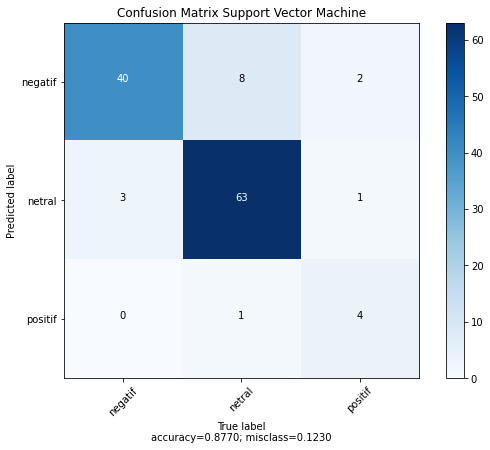

In [35]:
# Support Vector Machine Evaluation
print('Accuracy Suport Vector Machine: ', accuracy_score(y_test, predict_SV))
plot_confusion_matrix(cm           = confusion_matrix(predict_SV, y_test), 
                      normalize    = False,
                      target_names = ['negatif', 'netral', 'positif'],
                      title        = "Confusion Matrix Support Vector Machine")

In [42]:
# precision, recall, f1 score, support
macro_sv = precision_recall_fscore_support(y_test, predict_SV, average='macro')

In [43]:
# precision, recall, f1 score, support
micro_sv = precision_recall_fscore_support(y_test, predict_SV, average='micro')

In [50]:
# precision, recall, f1 score, support
weighted_sv = precision_recall_fscore_support(y_test, predict_SV, average='weighted')
weighted_sv

(0.8827991191583069, 0.8770491803278688, 0.8764106641709373, None)

In [38]:
cm = skm.multilabel_confusion_matrix(y_test, predict_SV)
print(cm)
print( skm.classification_report(y_test, predict_SV))

[[[ 69  10]
  [  3  40]]

 [[ 46   4]
  [  9  63]]

 [[114   1]
  [  3   4]]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        43
           1       0.94      0.88      0.91        72
           2       0.80      0.57      0.67         7

    accuracy                           0.88       122
   macro avg       0.85      0.79      0.81       122
weighted avg       0.88      0.88      0.88       122



In [55]:
# macro
macro = {'Precision':[macro_rf[0],macro_lr[0],macro_sv[0]],'Recall':[macro_rf[1],macro_lr[1],macro_sv[1]], 'F1':[macro_rf[2],macro_lr[2],macro_sv[2]]}
pd.DataFrame(macro, index=['Random Forest','Logistic Regression','Support Vector Machine']).style.highlight_max(color = 'darkgreen', axis = 0)

,Precision,Recall,F1
Random Forest,0.764030,0.815076,0.785543
Logistic Regression,0.727734,0.758198,0.740245
Support Vector Machine,0.846766,0.792220,0.811119


In [54]:
# micro
micro = {'Precision':[micro_rf[0],micro_lr[0],micro_sv[0]],'Recall':[micro_rf[1],micro_lr[1],micro_sv[1]], 'F1':[micro_rf[2],micro_lr[2],micro_sv[2]]}
pd.DataFrame(micro, index=['Random Forest','Logistic Regression','Support Vector Machine']).style.highlight_max(color = 'darkgreen', axis = 0)

,Precision,Recall,F1
Random Forest,0.852459,0.852459,0.852459
Logistic Regression,0.827869,0.827869,0.827869
Support Vector Machine,0.877049,0.877049,0.877049


In [56]:
weighted = {'Precision':[weighted_rf[0],weighted_lr[0],weighted_sv[0]],'Recall':[weighted_rf[1],weighted_lr[1],weighted_sv[1]], 'F1':[weighted_rf[2],weighted_lr[2],weighted_sv[2]]}
pd.DataFrame(weighted, index=['Random Forest','Logistic Regression','Support Vector Machine']).style.highlight_max(color = 'darkgreen', axis = 0)

,Precision,Recall,F1
Random Forest,0.860351,0.852459,0.854823
Logistic Regression,0.837711,0.827869,0.830079
Support Vector Machine,0.882799,0.877049,0.876411
